# Hausaufgabe 2
## Ablassung eines Stausees
<!-- Lizensiert unter (CC BY 4.0) Gert Herold, 2024 -->

Wegen Reparaturarbeiten an der Staumauer einer [Talsperre](https://de.wikipedia.org/wiki/Talsperre) soll das Wasser abgelassen werden. Der See habe ein Fassungsvermögen von $215 \cdot 10^6\,\text{m}^3$. Die Oberfläche des Stausees erstrecke sich über $10\,\text{km}^2$. Der Wasserauslass auf Grundhöhe habe einen Querschnitt von $2\,\text{m}^2$. Der Fluss selbst werde so umgeleitet, dass kein Wasser in den See nachfließen kann.

### 1) Anfangsbedingungen

**1.1) Es werde angenommen, die Form des Sees lasse sich mit einem umgedrehten [Kegel](https://de.wikipedia.org/wiki/Kegel_(Geometrie)) annähern. Wie tief ist dann der See?**

Speichern Sie das Ergebnis (in Metern) in der Variablen `h0` und geben Sie sie aus.

In [35]:
import math
h0 = None

# Constants for refactoring 
MILLION = 10**6
M2_PER_KM2 = MILLION

# Input Values 
volume = 215 * MILLION  # m³
surface = 10 * M2_PER_KM2  # m² (von km²)
outlet = 2  # m²

# Radius 
r_surface = math.sqrt(surface / math.pi)
r_outlet = math.sqrt(outlet / math.pi)

# Höhe berechnen

# Hannes Formel 
h0 = (3 * volume) / (math.pi * (r_outlet**2 + r_outlet * r_surface + r_surface**2))

print(f"Radius der Seeoberfläche: {r_surface:.2f} m")
print(f"Höhe: {h0:.2f} m")

Radius der Seeoberfläche: 1784.12 m
Höhe: 64.47 m


In [36]:
# Hier ist ein Plausibilitäts-Test:
assert 60 < h0 < 80

Vereinfachend werde angenommen, dass die sich ausbildende Strömung sich mithilfe der [Bernoulli-Gleichung](https://de.wikipedia.org/wiki/Bernoulli-Gleichung) beschreiben lasse:

$$
\frac{u^2}{2}+\frac{p}{\rho}+g \, z = \text{const}
$$

Dabei beschreibt $u$ die Strömungsgeschwindigkeit des Fluids an einer beliebigen betrachteten Stelle, $p$ den hydrodynamischen Druck, $\rho$ die Dichte und $z$ die Höhe. $g=9{,}81\frac{\text{m}}{\text{s}^2}$ ist die Erdbeschleunigung. Werden nur die Seeoberfläche und der Ausfluss betrachtet, so kann der Druck $p$ ebenfalls als konstant angenommen werden, da er dem Umgebungsdruck entspricht. Ebenso wird die Dichte als konstant angenommen, und die obige Gleichung vereinfacht sich zu 

$$
\frac{u^2}{2}+g \, z = \text{const}
$$

bzw. für oben und unten:

$$
\frac{u_\text{oben}^2}{2}+g\,z_\text{oben} = \frac{u_\text{unten}^2}{2}+g\,z_\text{unten}
$$

**1.2) Berechnen Sie die sich anfangs ausbildende Strömungsgeschwindigkeit am Ausfluss $u_\text{unten,0}$ (`u_unten0`) in m/s sowie den [Volumenstrom](https://www.leifiphysik.de/mechanik/stroemungslehre/grundwissen/kontinuitaetsgleichungen) $\dot{V_0}$ (`Vdot0`) in m³/s unter der Annahme, dass die Bewegung der Seeoberfläche vernachlässigbar ist.**

In [37]:
# Geschwindigkeit und Volumenstrom am Ausfluss
u_unten0 = None
Vdot0 = None

# Bernoulli-Gleichung mit u_oben² = 0:
# g * z_oben = u_unten²/2 + g * z_unten 

# Konstanten
g = 9.81  # Erdbeschleunigung in m/s²
z_unten = 0  # Auslass als Referenzpunkt

# Geschwindigkeit am Auslass nach Umformung:
# u_unten = √(2g * (z_oben - z_unten))
u_unten0 = math.sqrt(2 * g * h0)

# Volumenstrom = Querschnittsfläche * Geschwindigkeit
Vdot0 = outlet * u_unten0  # in m³/s

print(f"Geschwindigkeit am Auslass: {u_unten0:.2f} m/s")
print(f"Volumenstrom: {Vdot0:.2f} m³/s")


Geschwindigkeit am Auslass: 35.57 m/s
Volumenstrom: 71.13 m³/s


In [38]:
# Hier sind einige Plausibilitäts-Tests:
assert u_unten0 > 30
assert Vdot0 < 80

Tipp: Um die Kreiszahl $\pi$ unter Python verwenden zu können, muss man sie entweder selbst definieren oder z.B. aus dem [NumPy-Modul](https://numpy.org/) importieren. Für ein Beispiel den folgenden Code-Abschnitt öffnen.

In [39]:
# Importiere pi aus numpy
from numpy import pi

# Berechne den "Radius" der Seeoberfläche
r0 = (surface/pi)**0.5
print(f'Radius: {r0/1000:.2f} km')

Radius: 1.78 km


### 2) Leerung des Sees

**2.1) Schreiben Sie eine Funktion, die die Tiefe des "Kegel"-Sees (in Metern) allgemein abhängig von der enthaltenen Wassermenge bestimmt.**

Beachten Sie, dass sich die Form des Sees [nicht verändert](https://de.wikipedia.org/wiki/Strahlensatz) und somit der oben gegebene Wert für die Oberfläche nur bei vollem See gilt.

In [40]:
# Hannes Code verwenden

def tiefe(V):
    """
    Berechnet die aktuelle Wassertiefe des Stausees basierend auf dem vorhandenen Wasservolumen.
    
    Die Berechnung erfolgt durch Modellierung des Stausees als Differenz zweier Kegel:
    1. Ein großer Kegel mit der Grundfläche des Auslasses (r_outlet)
    2. Minus einem kleinen Kegel unterhalb des Auslasses
    
    Args:
        V (float): Aktuelles Wasservolumen im Stausee in m³
        
    Returns:
        float: Aktuelle Wassertiefe in m
    """
    # Geometrische Berechnungen für den Gesamtkegel
    
    # Aus dem Strahlensatz folgt für die Gesamthöhe:
    # Originale Formel:
    h_ges = (h0 * r_surface) / (r_surface - r_outlet)
    
    # Höhe des abgeschnittenen Kegels unterhalb des Auslasses
    h_kegelstumpf = h_ges - h0
    
    # Berechnung der aktuellen Höhe mittels Volumenvergleich
    h = h_ges * (V/volume)**(1/3)
    
    # Tatsächliche Wassertiefe = Aktuelle Höhe - Höhe des abgeschnittenen Kegels
    if h <= h_kegelstumpf:
        return 0
    else:
        return h - h_kegelstumpf


print(tiefe(volume))

64.47115472885672


In [41]:
# Hier sind einige Plausibilitäts-Tests:
assert abs(h0-tiefe(215e6)) < 1e-5
assert abs(50-tiefe(1e8)) < 0.1

**2.2) Schreiben Sie eine Funktion, die den diskreten Zeitverlauf der Wassertiefe $h(t)$ bis zur Leerung des Sees zurückgibt.**

  * Die Funktion soll ein Startvolumen $V_0$ und eine Zeitschrittweite $\Delta t$ übergeben bekommen.
  * Verwenden Sie in den Berechnungen standardmäßig [SI-Einheiten](https://de.wikipedia.org/wiki/Internationales_Einheitensystem).
  * Beachten Sie, dass sich auch der Volumenstrom zeitlich ändert.
  * Die Funktion soll alle berechneten Zeiten und die jeweils zugehörigen Tiefen in zwei getrennten Listen zurückgeben.
  
_Hinweise:_
  * Die Änderung des Volumens lässt sich annähernd über $V_{n+1}=V_n-\dot{V_n} \cdot \Delta t$ beschreiben.
  * Der See kann auch als leer betrachtet werden, wenn im kommenden Zeitschritt mehr Wasser herausfließen würde als noch enthalten ist.

In [42]:
def abfluss(V0, dt):
    """
    Berechnet den zeitlichen Verlauf der Wassertiefe beim Ablassen des Stausees.
    
    Args:
        V0: Anfangsvolumen in m³
        dt: Zeitschrittweite in Sekunden
        
    Returns:
        t_list, h_list: Listen mit Zeitpunkten und zugehörigen Wassertiefen
    """
    V = V0
    t = 0
    t_list = [t]
    h_list = [tiefe(V)]
    
    g = 9.81  # Erdbeschleunigung
    A = 2  # Querschnittsfläche des Auslasses in m²
    
    while V > 0:
        h = tiefe(V)
        
        if h <= 0:
            break
            
        # Ausflussgeschwindigkeit nach Bernoulli
        v = math.sqrt(2 * g * h)
        
        # Volumenstrom
        dV = A * v * dt
        
        # Verhindere, dass mehr Wasser abfließt als vorhanden
        if dV > V:
            break
            
        V = V - dV
        t += dt
        
        t_list.append(t)
        h_list.append(tiefe(V))
        
    return t_list, h_list

t1, h1 = abfluss(volume, 3600 * 24)
print(h1[-1], t1[-1])

11.613999889734277 3542400


In [43]:
# Hier sind einige Plausibilitäts-Tests:
assert len(abfluss(10,1))==2
assert type(abfluss(10,1)[0])==type(abfluss(10,1)[1])==list

**2.3) Wie lange dauert es, bis der Stausee komplett abgelassen wurde?** 

  * Plotten Sie den Zeitverlauf der Wassertiefe bis zur Leerung für zwei Zeitschrittweiten:
    * $\Delta t_1$ = 1 Minute
    * $\Delta t_2$ = 4 Tage
  * Zeichnen Sie beide Verläufe in dasselbe Diagramm und diskutieren Sie Auffälligkeiten.

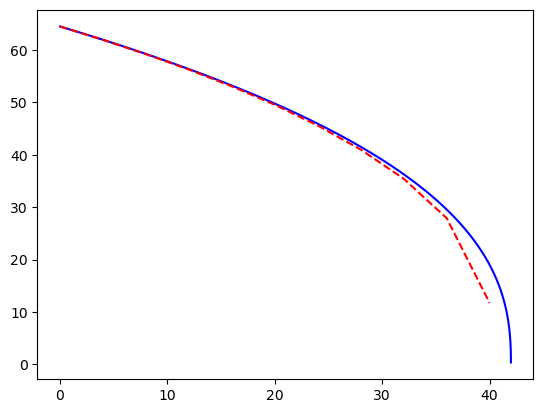

In [44]:
%matplotlib inline
from matplotlib.pyplot import plot, show
# Plotbefehl: plot(x_werte_liste, y_werte_liste)

import matplotlib.pyplot as plt

HOURS_PER_DAY = 24
MIN_PER_HOUR = 60
SEK_PER_MIN = 60
# Zeitschritte 
dt1 = 1 * SEK_PER_MIN # 1 Minute in sek 
dt2 = 4 * HOURS_PER_DAY * MIN_PER_HOUR * SEK_PER_MIN # 4 Tage in sek 

t1, h1 = abfluss(volume, dt1)
t2, h2 = abfluss(volume, dt2)
        
dt1_days = [t/86400 for t in t1]
dt2_days = [t/86400 for t in t2]

plot(dt1_days, h1, "b-")
plot(dt2_days, h2, "r--")
show()

### 3) Anderer See

Wiederholen Sie Aufgabenteil 2.3) unter der Annahme, dass der See bei gleichem Volumen und gleicher Oberfläche annähernd durch einen *Zylinder* beschrieben wird. Schreiben Sie hierfür möglichst wenig neuen Code.

Entleerungszeit Zylinder (dt = 1 min): 121.2 Tage
Entleerungszeit Zylinder (dt = 4 Tage): 108.0 Tage


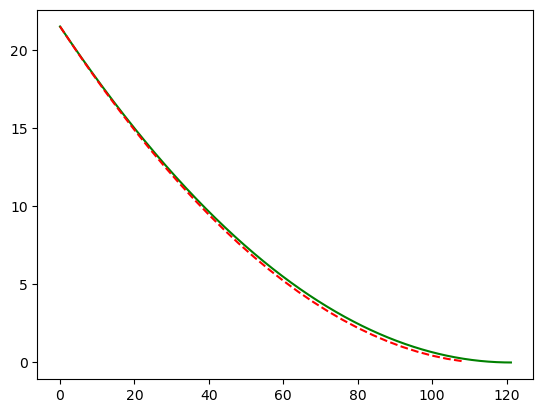

In [45]:
# Hier eigenen Code schreiben 
def tiefe_zylinder(V): 
    """Berechnet die Wassertiefe für einen Zylinder"""
    return V / surface if V > 0 else 0

def abfluss_zylinder(V0, dt):
    """
    Berechnet die Wassertiefe für einen Zylinder
    
    Args:
        V0: Übergebenes Volumen 
        dt: Übergebener Zeitschritt
    Returns:
        t_list, h_list: Zwei Listen mit den Zeitpunkten und den jeweiligen Wassertiefen 
    """
    V = V0 
    t = 0
    t_list = [t]
    h_list = [tiefe_zylinder(V)]
    
    g = 9.81  # Erdbeschleunigung 
    A = 2     # Grundfläche Auslass in Metern 
    
    while V > 0: 
        h = tiefe_zylinder(V)
        if h <= 0: 
            break
        
        # Neues Volumen berechnen 
        v = math.sqrt(2 * g * h)
        dV = A * v * dt  # Korrigiert: v statt V
        
        # Mehr fließt aus als vorhanden: 
        if dV > V: 
            break
        
        V = V - dV
        t += dt
        
        t_list.append(t)
        h_list.append(tiefe_zylinder(V))
        
    return t_list, h_list

# Zeitschrittweiten
dt1 = 60  # 1 Minute in Sekunden
dt2 = 4 * 24 * 3600  # 4 Tage in Sekunden

# Berechnung
t1, h1 = abfluss_zylinder(volume, dt1)
t2, h2 = abfluss_zylinder(volume, dt2)

# Umrechnung in Tage
t1_days = [t/86400 for t in t1]
t2_days = [t/86400 for t in t2]

# Normaler Plot: 
plot(t1_days, h1, "g-")
plot(t2_days, h2, "r--")

# Ausgabe der Entleerungszeiten
print(f"Entleerungszeit Zylinder (dt = 1 min): {t1_days[-1]:.1f} Tage")
print(f"Entleerungszeit Zylinder (dt = 4 Tage): {t2_days[-1]:.1f} Tage")